# Introduction to Pandas (reddit)


Full dataset at:

https://www.kaggle.com/colemaclean/subreddit-interactions

### Note about the dataset: each line represents ONE COMMENT

## Why Pandas

1. Very familiar interface / data model (Table / Excel)
2. Query data very interactively (once the data is loaded in your notebook, instant answer)
3. Complete freedom in creating custom code

GOOD TO KNOW
- Pandas is a massive library. Even after this class, there'll be a lot of things you won't know from pandas. Use the doc !


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/niparis/ga-intermediate-python-ds/master/datasets/reddit_100k.csv')

/Users/nicolasparis/.pyenv/versions/3.8.2/envs/jupyter/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### Having a look at the data

head is a `method` of DataFrame objects. It is called by using the brackets.

head is equivalent to the SQL expression "LIMIT 5"

In [ ]:
df.head()

,username,subreddit,utc
0,kabanossi,photoshopbattles,1.482748e+09
1,kabanossi,GetMotivated,1.482748e+09
2,kabanossi,vmware,1.482748e+09
3,kabanossi,carporn,1.482748e+09
4,kabanossi,DIY,1.482747e+09


We can pass a `parameter` to the `method` head. 

That's how we can control how many lines of the DataFrame `head` will display

In [ ]:
# example with the parameter 2
df.head(2)

,username,subreddit,utc
0,kabanossi,photoshopbattles,1.482748e+09
1,kabanossi,GetMotivated,1.482748e+09


### Let's start we some simple data cleaning

The utc timestamp is a EPOCH timestamp in seconds

Fortunately pandas has a built-in function to transform it to a more usable *datetime* object: `pd.to_datetime`

In [ ]:
# cleaning the utc timestamp: a typical "data cleaning" operation
# the result from the expression on the right of the = is *assigned* to the left expression
# df['utc'] means "selecting the column utc from the dataframe df"
df['utc'] = pd.to_datetime(df['utc'],unit='s')

In [ ]:
df.head()

,username,subreddit,utc
0,kabanossi,photoshopbattles,2016-12-26 10:24:59
1,kabanossi,GetMotivated,2016-12-26 10:23:14
2,kabanossi,vmware,2016-12-26 10:21:16
3,kabanossi,carporn,2016-12-26 10:20:18
4,kabanossi,DIY,2016-12-26 10:17:59


### Let's create a new column containing only the date

We might need to have access to the date without the time information. 

It will let us aggregate the reddit data by day, to create for instance a daily timeline.

For this, we're going to use the `apply` DataFrame method. This is a very handy function that lets us modify a column in any way we want. To use it, first need to create a function that will be called on each element (or cell) of the column we want to transform.

In our case, we want to transform a `datetime` object into a `date` object, so we can write the following function:

## Transformations

WHY: To transform some existing column, or create a new column from an existing one

HOW: Use the `.apply` function. Here’s the basic syntax:

	   <dataframe>[<column-selection>].apply(<function>)


### How it works

![image.png](attachment:image.png)

In [ ]:
def transform_to_date(elem):
    # extract the date from a datetime. 
    # date is a method of the datetime object, that's why it has to be called with `()`
    return elem.date()

In [ ]:
df['date'] = df['utc'].apply(transform_to_date)

Then we can apply the `transform_to_date` function to the utc column, and assign the result to a new column called `date`

In [ ]:
df['date'] = df['utc'].apply(transform_to_date)
df.head(2)

,username,subreddit,utc,date
0,kabanossi,photoshopbattles,2016-12-26 10:24:59,2016-12-26
1,kabanossi,GetMotivated,2016-12-26 10:23:14,2016-12-26


Another example: month of year.
    
We create another function, apply it to the same `utc` column, and assign the result to a new column called `month`

In [ ]:
def get_month_of_year(elem: dt.datetime):
    # month is an `attribute` from the pandas timestamp object (which is why it doesnt have to be called with `()`)
    return elem.month

df['month'] = df['utc'].apply(get_month_of_year)

## Filtering

WHY: To keep only part of the data, either to :

HOW: Use the `.query` function. Here’s the basic syntax:

	   <dataframe>.query(”column operation value”)


NOTE: “column operation value” is a STRING.

EXAMPLES:
A. df.query(“column > 4”)
Filters any row where the value of column is greater than 4
B. df.query(“column > second-column”)
Filters any row where the value of column is greater is greater than the value in second-column

NEXT: Once you’re comfortable with .query, learn .loc. 

Benefits of .loc: 
A. Can add /change a value in the filtered expression
B. complex filtering logic 


A. Add /change a value in the filtered expression with .loc

Example:
df.loc[df[”column_to_filter”] == “critera” , “cats”] = “meow”

Explanation:

For all rows where the value in the column “column_to_filter” is strictly equal to “criteria”, ASSIGN the value “meow” in the column ”cats”

Note:
If the column “cats” does not exist, it will be created on the fly.
Any value not filtered will become “None”



B. Can do more complex filtering logic (multi criterias, mixing AND / OR)

Example:
     df.loc[(df[”column_to_filter”] == “critera”) | (df[”second_criteria”] > 4)]

Explanation:
Filters any row having either “criteria” as the value in the column “column_to_filter” 
OR strictly more than 4 as the value in the column “second_criteria”

Note: pipe ( | ) is used for logical OR, ampersand ( & ) is used for logical ANDS

In [ ]:
# select december
df.query("month == 12")

,username,subreddit,utc,date,month
0,kabanossi,photoshopbattles,2016-12-26 10:24:59,2016-12-26,12
1,kabanossi,GetMotivated,2016-12-26 10:23:14,2016-12-26,12
2,kabanossi,vmware,2016-12-26 10:21:16,2016-12-26,12
3,kabanossi,carporn,2016-12-26 10:20:18,2016-12-26,12
4,kabanossi,DIY,2016-12-26 10:17:59,2016-12-26,12
...,...,...,...,...,...
99995,ThundercuntIII,cripplingalcoholism,2016-12-23 14:56:06,2016-12-23,12
99996,ThundercuntIII,Advice,2016-12-23 14:55:24,2016-12-23,12
99997,ThundercuntIII,mildlyinteresting,2016-12-23 14:53:56,2016-12-23,12
99998,ThundercuntIII,cripplingalcoholism,2016-12-23 14:52:19,2016-12-23,12


In [ ]:
df.loc[(df.month.isin([10, 11, 12])) &
       (df.utc > dt.datetime(2015, 1, 1))]

,username,subreddit,utc,date,month
0,kabanossi,photoshopbattles,2016-12-26 10:24:59,2016-12-26,12
1,kabanossi,GetMotivated,2016-12-26 10:23:14,2016-12-26,12
2,kabanossi,vmware,2016-12-26 10:21:16,2016-12-26,12
3,kabanossi,carporn,2016-12-26 10:20:18,2016-12-26,12
4,kabanossi,DIY,2016-12-26 10:17:59,2016-12-26,12
...,...,...,...,...,...
99995,ThundercuntIII,cripplingalcoholism,2016-12-23 14:56:06,2016-12-23,12
99996,ThundercuntIII,Advice,2016-12-23 14:55:24,2016-12-23,12
99997,ThundercuntIII,mildlyinteresting,2016-12-23 14:53:56,2016-12-23,12
99998,ThundercuntIII,cripplingalcoholism,2016-12-23 14:52:19,2016-12-23,12


## Group By

Pandas `groupby` is a powerful to perform aggregations on pandas DataFrames. It works very similarly to the SQL `GROUP BY` clause, with the added benefit of being able to define any custom aggregation function in python.

Let's start with a very simple aggregation: finding the number of comments per user.

Here's the logic of the groupby:
1. The argument of the `groupby` function (here: 'username') will be reduced to unique elements

```
df.groupby('username')
```
2. Then we select on which column we want to perform our aggregation. In our case, we want a count of comments, so any column will do:

```
df.groupby('username')['subreddit']
```

3. Finally, we select the aggregation method - in our case, a count:

```
df.groupby('username')['subreddit'].count()
```

In english, this reads:

*For each username, let's count the number of rows.*

WHY: To transform some existing column, or create a new column 
from an existing one

HOW: Use the `.groupby` function. Here’s the basic syntax:

<dataframe>.groupby(<column_to_reduce>).agg({“target_column” : “function”})


    
![image.png](attachment:image.png)

In [ ]:
# a typical groupby operation. Here we're adding sort_values and head methods to display the results nicely
df.groupby('username')['subreddit'].count().sort_values(ascending=False).head(10)


username
Spyrothedragon9972    1000
PumpTrump             1000
SidDriver             1000
bruux                 1000
Steel_Wool_Sponge     1000
SweelFor              1000
TalosThoren           1000
jackcalx              1000
TeslaAddict           1000
Tethalamin            1000
Name: subreddit, dtype: int64

#### Unique subreddits by username

We can reuse the same syntax, just changing the aggregation method

In [ ]:
# How many unique subreddits per user
# in english: For each username, how many unique records can we find in the "subreddit" column
df.groupby('username')['subreddit'].nunique().sort_values(ascending=False).head(10)


username
xkcd_transcriber    496
Exuberant_Murica    188
kabanossi           187
Hcfielden           182
bigbuddha999        164
ZoomJet             154
fauxhb              154
bob-leblaw          142
gm4                 139
not_for_porns       127
Name: subreddit, dtype: int64

## Putting it together

### For each user, let's compute the number of comments per subreddit

Here are the steps to be able to compute this:
1. Get the comments and unique subreddits per username
2. Compute the ratio
3. Format results

First step: let's get the comments and unique subreddit in one operation


In [ ]:
df1 = df.groupby('username')[['subreddit']].count().rename(columns={'subreddit':'comments'})
df2 = df.groupby('username')[['subreddit']].nunique().rename(columns={'subreddit':'unique_subs'})
df3 = df1.merge(df2, left_index=True, right_index=True).head()

In [ ]:
df3['comments_per_sub'] = df3['comments'] / df3['unique_subs']
df4 = df3.sort_values(by='comments_per_sub', ascending=False)
df4.head()

,comments,unique_subs,comments_per_sub
username,,,
AbulaShabula,363,33,11.000000
-goodguygeorge,978,106,9.226415
0mn17h3047,211,25,8.440000
01is,353,44,8.022727
414D59,117,17,6.882353


In [ ]:
# A simple example, where we select all users who've made strictly less than 1000 comments
df4.loc[df4['comments'] != 1000].head()

,comments,unique_subs,comments_per_sub
username,,,
AbulaShabula,363,33,11.000000
-goodguygeorge,978,106,9.226415
0mn17h3047,211,25,8.440000
01is,353,44,8.022727
414D59,117,17,6.882353


### Using filtering to find active redditors

Let's use filtering to identify active redditors, which we'll define as users:
1. Not having exactly 1000 comments (this number looks artificial, let's remove it as a potential outlier)
2. Having either :
- Commented in at least 10 subreddits
- At least 3 comments per subreddit


In [ ]:
# Then we find out who are the active users in our population by using this expresion. 
# Note:
# - the '&' signifies a lofgical AND
# - the '|' signifies a lofgical OR
active_redditors = df4.loc[
                           (df4['comments'] != 1000) & 
                            # note the use of brackets to isolate the OR expression
                           ((df4['unique_subs'] >= 10) | (df4['comments_per_sub'] >= 3))  
                          ]
msg = f'there are {len(active_redditors)} active redditors in our sample'
print(msg)

there are 5 active redditors in our sample


#### Exercise 2

1. Find each subreddit, find how many users have the string "trump" (case insensitive) in their name, and how many comments they have made
2. What are the top 10 subreddits who have the most comments made by users with "trump" in their name
3. Can you adapt the code to look for any string


#### Exercise 3

1. Find the top 10 subreddits with the most users
2. For active redditors, find the median number of comments, the 25th and 75th percentile of unique_subs
3. Find the subreddit with the most comments in one hour (including the date component)
4. Plot a timeserie of:
    - Number of comments per day
    - Number of comments per day, only in subreddit where at least one "trump user" has commented, only comments written since 01 Jan 2016
5. [optional] Recompute the active redditors in a single expression    



In [ ]:
## exercise code goes here

## Exercise 1
(df.groupby('subreddit')
 .agg({'username':'nunique'})
 .sort_values(by='username', ascending=False)
 .head(1)
)

,username
subreddit,
AskReddit,141


# Find the subreddit with the most comments in one hour (including the date component)


In [ ]:
def get_short_day(elem):
    return dt.datetime(year=elem.year, month=elem.month, day=elem.day, hour=elem.hour) 

df['date+hour'] = df['utc'].apply(get_short_day)

In [ ]:
df.groupby(['subreddit', 'date+hour'])['utc'].count().sort_values(ascending=False).head(10)

subreddit  date+hour          
news       2016-12-26 15:00:00    108
nba        2016-04-16 20:00:00     59
           2016-04-19 03:00:00     47
linux      2016-03-20 01:00:00     41
FlashTV    2016-11-30 01:00:00     40
CFB        2016-11-05 17:00:00     39
nba        2016-04-19 04:00:00     37
AskReddit  2016-12-25 12:00:00     37
linux      2016-03-16 04:00:00     35
AskReddit  2016-12-23 16:00:00     34
Name: utc, dtype: int64

# Plot a timeserie of:
   - Number of comments per day
   - Number of comments per day, only in subreddit where at least 
one "trump user" has commented, only comments written since 01 Jan 2016    

### A basic chart

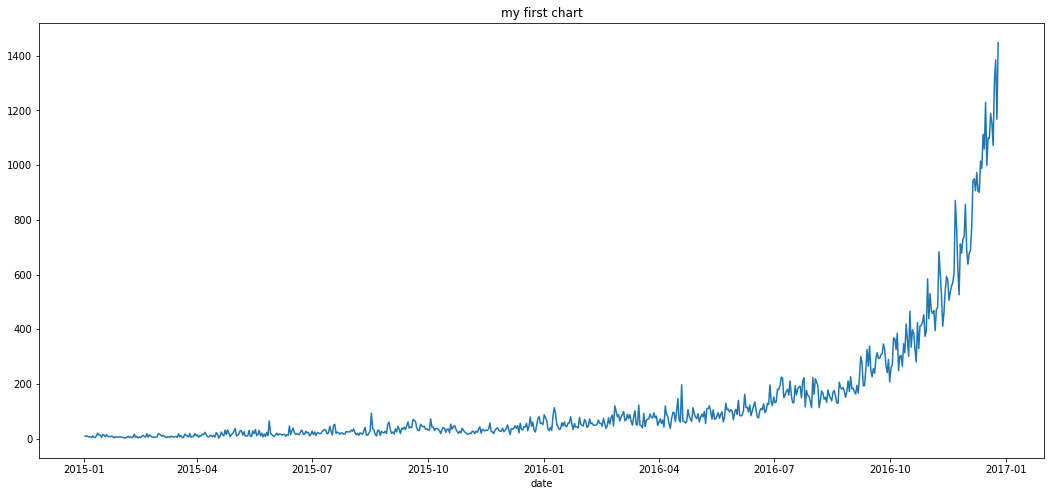

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

(df.loc[df.date > dt.date(2015, 1, 1)]
 .groupby('date')['username'].count()
 .plot(figsize=(18, 8), title='my first chart')
)


### The same chart, but using more pre-processing

In [ ]:
def has_token(username, token):
    if token.lower() in username.lower():
        return True

token = 'you'
df['has_token'] = False
df['has_token'] = df['username'].apply(has_token, args=(token, ))
print(f"{len(set(df.loc[df.has_token == True, 'username']))} users have {token} in their username")
print('And those usernames are:\n')
for idx, name in enumerate(set(df.loc[df.has_token == True, 'username'])):
    print(f"{idx+1}- {name}")

4 users have you in their username
And those usernames are:

1- ICanHearYouHavingSex
2- HeyitsmeyourOP
3- PM-ME-YOUR-SHOULDER
4- iamtryingtobreakyou


In [ ]:
# subs_token contains all the subreddits where users with the "token" 
# in their usernames have left comments
subs_token = set(df.loc[df.has_token == True, 'subreddit'])

#### Now we can plot a timeline of the numbers of comments posted on all the subreddits
#### where users with *token* in their name are posting

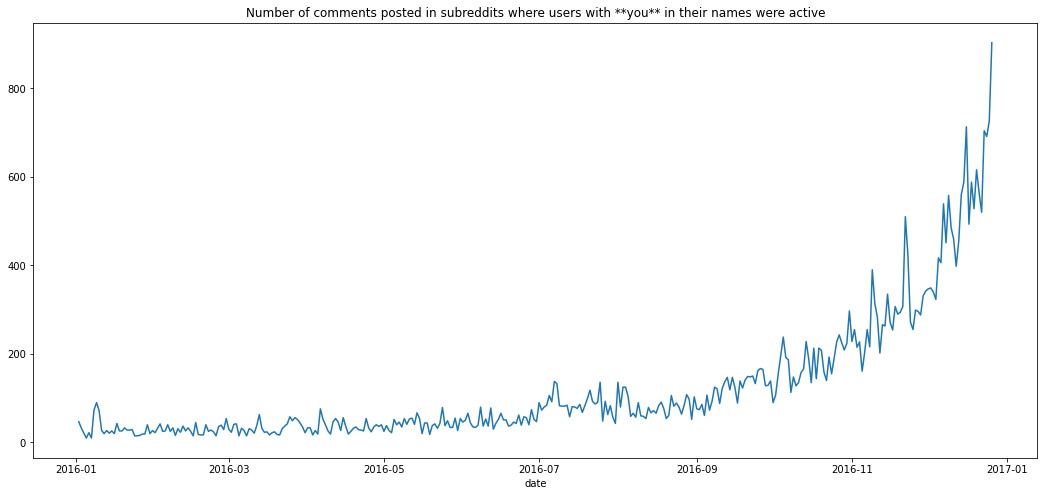

In [ ]:
(df.loc[(df.subreddit.isin(subs_token)) & (df.date > dt.date(2016, 1, 1))]
   .groupby('date')['username']
   .count()
   .sort_values(ascending=False)
   .plot(kind='line', 
         figsize=(18,8), 
         title=f'Number of comments posted in subreddits where users with **{token}** in their names were active')
) 